<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/Other%20Notebooks/nhan_dien_bien_so.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from keras.activations import *
import os
from keras.utils import to_categorical, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.callbacks import *
from keras.losses import *
from keras import Sequential
from keras.models import load_model
import random

# Tiền xử lý ảnh với OpenCV

162.2484717370594


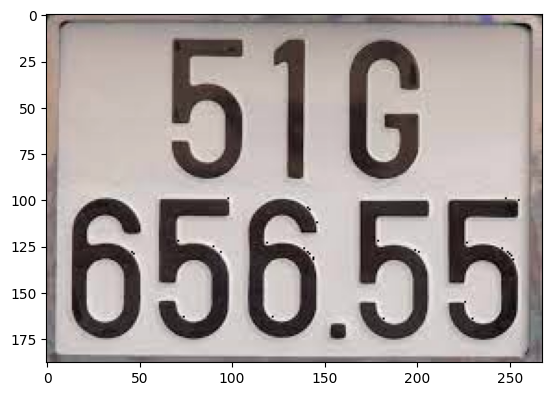

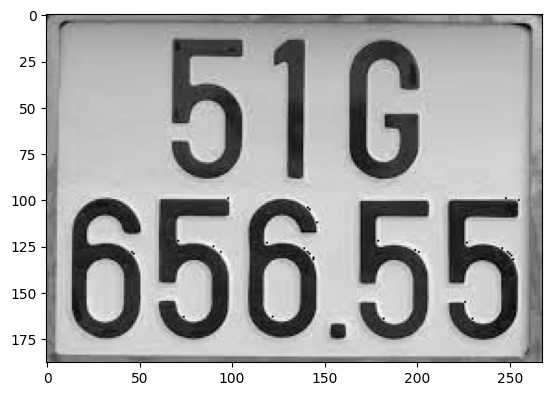

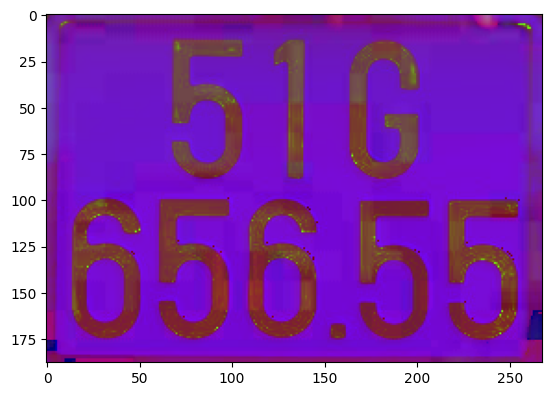

In [ ]:
# Đọc & chuyển đổi hệ màu
raw_image = cv.imread('/content/drive/MyDrive/TF_Training/sample_img/license_plate_3.jpg', cv.COLOR_RGB2BGR)
gray_image = cv.cvtColor(raw_image, cv.COLOR_BGR2GRAY)
hsv_image = cv.cvtColor(raw_image, cv.COLOR_BGR2HSV)

# Tăng độ sáng ảnh nếu quá tối
h, s, v = hsv_image[:, :, 0], hsv_image[:, :, 1], hsv_image[:, :, 2]
brightness = np.mean(v)
print(brightness)
if brightness < 164:
  hsv_image[:, :, 2] = hsv_image[:, :, 2] + (164 - brightness)
  raw_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)
  gray_image = cv.cvtColor(raw_image, cv.COLOR_BGR2GRAY)

for i in [raw_image, gray_image, hsv_image]:

  plt.imshow(i, cmap='gray')
  plt.show()


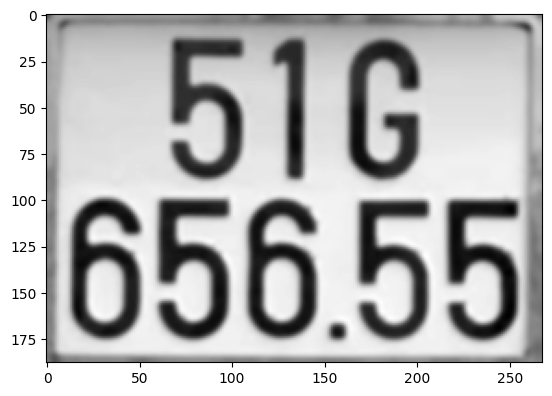

In [ ]:
# Khử nhiễu ảnh bằng Gaussian
gauss_image = cv.GaussianBlur(gray_image, (7, 7), cv.BORDER_CONSTANT)

plt.imshow(gauss_image, cmap='gray')
plt.show()

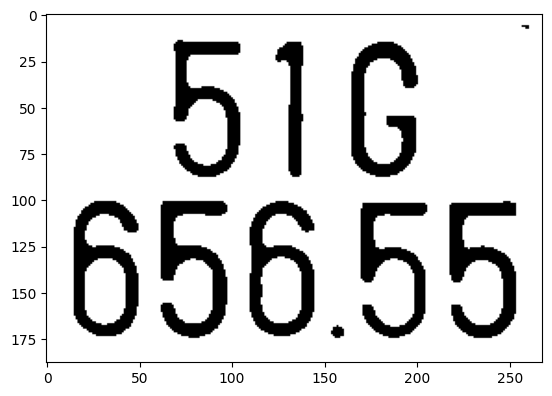

In [ ]:
# Phân ngưỡng ảnh bằng Threshold
_, thresh_image = cv.threshold(gauss_image, 80, 255, cv.THRESH_BINARY)
plt.imshow(thresh_image, cmap='gray')
plt.show()

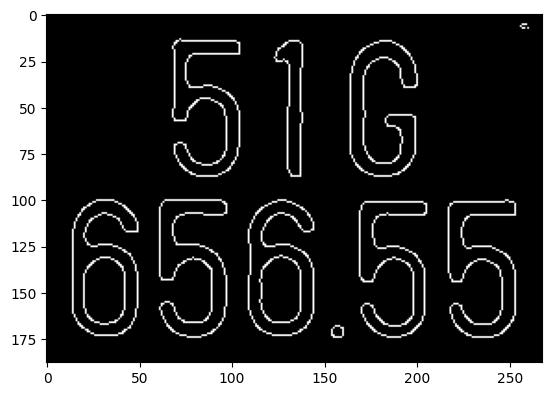

In [ ]:
# Phát hiện cạnh Canny Edge
edge_image = cv.Canny(thresh_image, 80, 255)

plt.imshow(edge_image, cmap='gray')
plt.show()

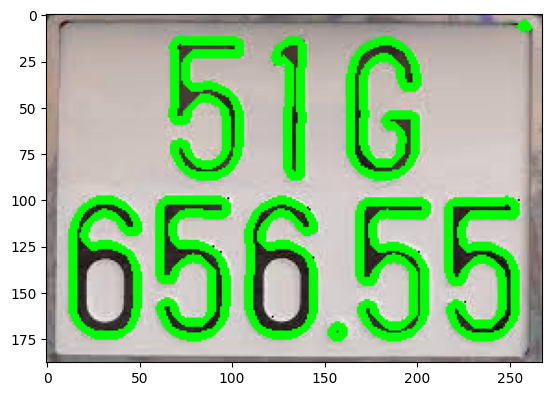

In [ ]:
# Tìm & vẽ các Contour để xác định vị trí các kí tự
raw_image_copy = raw_image.copy()
contours, _ = cv.findContours(edge_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(raw_image_copy, contours, -1, (0,255,0), 3)

plt.imshow(raw_image_copy)
plt.show()


In [ ]:
# Lọc lấy các kí tự
chars_boxes = []
for i in range(len(contours)):
  x, y, w, h = cv.boundingRect(contours[i])
  if 16 <= w <= 40 and 70 <= h <= 80:
    chars_boxes.append([x, y, w, h])
chars_boxes = chars_boxes[::-1]
print(len(chars_boxes))


8


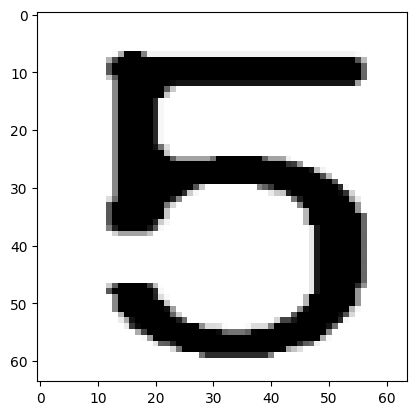

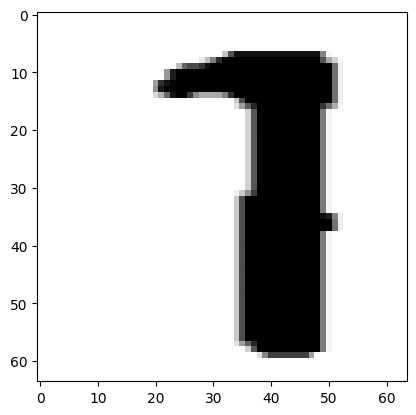

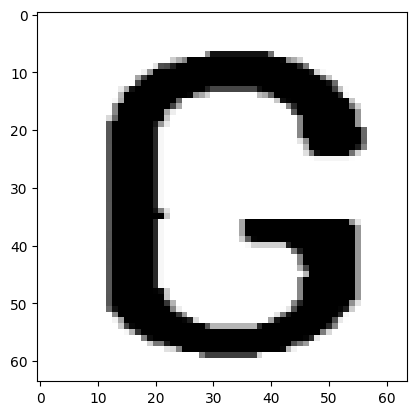

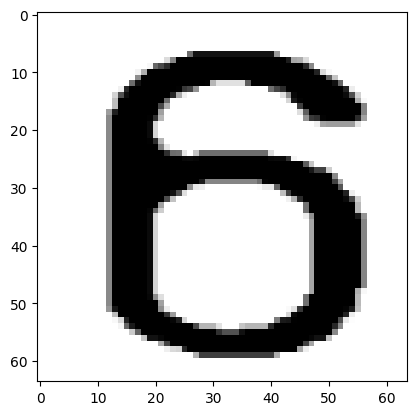

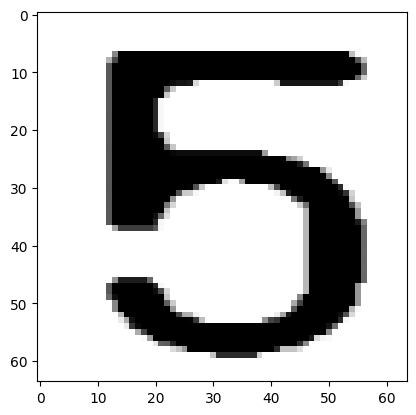

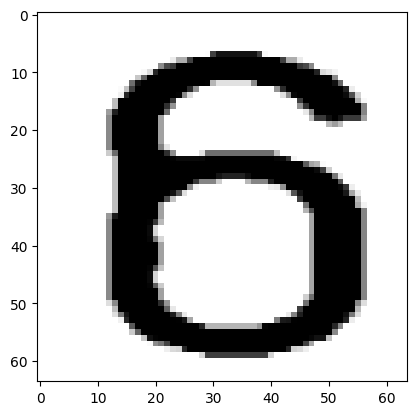

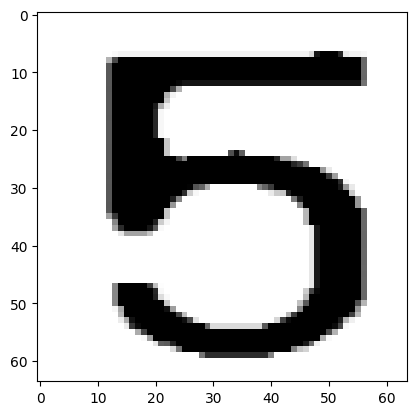

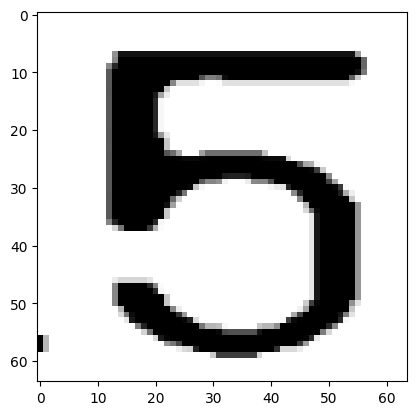

In [ ]:
# In thử các kí tự đã lọc & crop ảnh của từng kí tự để Train
chars_image = []
for x, y, w, h in chars_boxes:
  x -= 9
  y -= 9
  w += 15
  h += 15
  im = thresh_image[y: y + h, x: x + w]
  im = cv.resize(im, (64, 64))
  im = img_to_array(im) / 255.
  chars_image.append(im)
  plt.imshow(im, cmap='gray')
  plt.show()

chars_image = np.asarray(chars_image)

# Xây dựng & đào tạo mô hình

In [ ]:
# Giải nén bộ dữ liệu kí tự
!unzip -n '/content/drive/MyDrive/TF_Training/datasets/image_classification/EnglishFnt.zip'


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00085.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00086.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00087.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00088.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00089.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00090.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00091.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00092.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00093.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00094.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00095.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00096.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00097.png  
 extracting: EnglishFnt/English/Fnt/Sample032/img032-00098.png  
 extracting: EnglishFnt/English/F

In [ ]:
# Kiểm tra bộ dữ liệu
for root_dir, sub_dir, file_names in os.walk('./EnglishFnt/English/Fnt'):
  print(f'Có {len(sub_dir)} thư mục con & {len(file_names)} tệp trong thư mục {root_dir}')


Có 36 thư mục con & 0 tệp trong thư mục ./EnglishFnt/English/Fnt
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample025
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample012
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample002
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample007
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample034
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample004
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample035
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample006
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample003
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample011
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample031
Có 0 thư mục con & 1016 tệp trong thư mục ./EnglishFnt/English/Fnt/Sample019
Có 0 thư mụ

In [ ]:
# Xác định nhãn của bộ dữ liệu
digits = [str(i) for i in range(10)]
uppercase_letters = [chr(i) for i in range(ord('A'), ord('Z')+1)]
char_labels = digits + uppercase_letters
print(char_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
# Nạp ảnh & convert numpy
images = []
labels = []

i = 0
path = './EnglishFnt/English/Fnt/'
for label in sorted(os.listdir(path)):
  char_path = path + label
  for image in os.listdir(char_path):
    image = cv.imread(char_path + '/' + image, 0)
    image = cv.resize(image, (64, 64))
    image = np.expand_dims(image, axis=2)
    images.append(image)
    labels.append(i)
  i+=1

images = np.asarray(images) / 255.
labels = to_categorical(np.asarray(labels), num_classes=len(char_labels))

In [ ]:
# Tách mảng để Train/Test
x_train, x_test, y_train, y_test = train_test_split(
    images,
    labels,
    test_size=.20,
    random_state=50
)
print('THỐNG KÊ TẬP TRAIN/TEST')
print(f'TRAIN: {y_train.shape[0]}')
print(f'TEST: {y_test.shape[0]}')

THỐNG KÊ TẬP TRAIN/TEST
TRAIN: 29260
TEST: 7316


In [ ]:
# Tăng cường ảnh
img_model = ImageDataGenerator(zoom_range=.2, rescale=1./255.)
train_ds = img_model.flow(
    x_train,
    y_train
)


In [ ]:
# Xây dựng mô hình
def my_model():
  model = Sequential([
      InputLayer(input_shape=(64, 64, 1)),

      Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'),
      MaxPooling2D(2),
      Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'),
      Conv2D(32, (3, 3), strides=2, padding='same', activation='relu'),

      GlobalAveragePooling2D(),

      Flatten(),

      Dense(128, activation='relu', kernel_regularizer='l2'),
      Dropout(.10),
      Dense(32, activation='relu'),
      Dropout(.10),

      Dense(len(char_labels), activation='softmax')
  ])
  model.compile(
      'adam',
      CategoricalCrossentropy(),
      'accuracy'
  )
  return model

In [ ]:
model = my_model()
model.summary()
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    callbacks=[
        EarlyStopping(
            'val_accuracy',
            patience=8,
            restore_best_weights=True
        ),
        ReduceLROnPlateau(
            'val_accuracy',
            patience=2,
            min_lr=.0001
        )
    ]
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 global_average_pooling2d_8  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_8 (Flatten)         (None, 32)               

In [ ]:
# Lưu mô hình
model.save('/content/drive/MyDrive/TF_Training/models/char_model.keras')

# Đánh giá mô hình & dự đoán ký tự

229/229 [==============================] - 4s 18ms/step


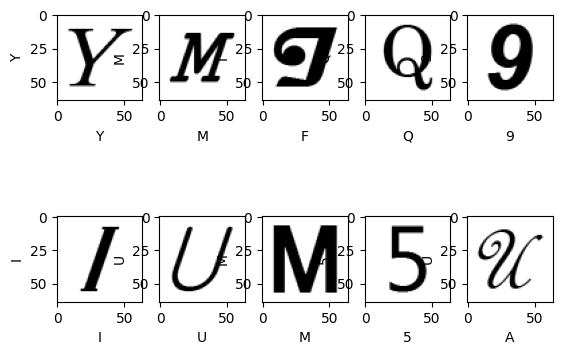

In [ ]:
# Dự đoán thử 10 ảnh tập Test
char_model = load_model('/content/drive/MyDrive/TF_Training/models/char_model.keras')
pred_test = char_model.predict(x_test)
for i in range(10):
  a = random.randint(0, y_test.shape[0])
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_test[a], cmap='gray')
  plt.xlabel(char_labels[np.argmax(pred_test[a])])
  plt.ylabel(char_labels[np.argmax(y_test[a])])
plt.show()

1/1 [==============================] - 0s 31ms/step


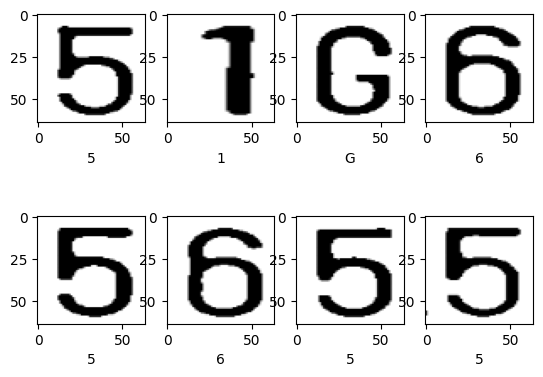

=> Biển số xe: 51G65655


In [ ]:
# Dự đoán kí tự trên biển số
pred_chars = char_model.predict(chars_image)
bien_so_xe = str()

for i in range(len(chars_image)):
  plt.subplot(2, 4, i + 1)
  plt.imshow(chars_image[i], cmap='gray')
  plt.xlabel(char_labels[np.argmax(pred_chars[i])])
  bien_so_xe += char_labels[np.argmax(pred_chars[i])]
plt.show()

print(f'=> Biển số xe: {bien_so_xe}')